# Notebook for CRN4

This notebook can be used to generate data on the bursting gene chemical reaction.

In [2]:
import sys
sys.path.append('../')
import numpy as np
import torch
import matplotlib.pyplot as plt
import neuralnetwork
import convert_csv
import generate_data
import simulation
import get_sensitivities
import seaborn
import pandas as pd
from scipy.stats import poisson
import math
import ode
from typing import Tuple, Callable
from CRN4_bursting_gene import propensities_bursting_gene as propensities

## Import data

In [3]:
FILE_NAME = 'CRN4_bursting_gene/data'
CRN_NAME = 'bursting_gene'
NUM_PARAMS = 4

Error in data: Inputs have 4 parameters but only the 1st one counts.

In [4]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')
X_train4 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train4.csv')
X_train5 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train5.csv')
X_train6 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train6.csv')

y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')
y_train4 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train4.csv')
y_train5 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train5.csv')
y_train6 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train6.csv')

X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')
X_valid4 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid4.csv')
X_valid5 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid5.csv')
X_valid6 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid6.csv')

y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')
y_valid4 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid4.csv')
y_valid5 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid5.csv')
y_valid6 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid6.csv')

X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

In [4]:
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/copie/X_{CRN_NAME}_train1_copie.csv')
x = np.zeros_like(X_train1)
x[:,0] = X_train1[:,0]
x[:,1] = 0.05*X_train1[:,1]
x[:,2] = 0.15*X_train1[:,1]
x[:,3] = np.ones_like(x[:,3]) * 5
x[:,4] = np.ones_like(x[:,4]) * 0.05
# print(x[0,:], X_train1[0,:])
# convert_csv.array_to_csv(x, f'X_{CRN_NAME}_train1.csv')

## Choosing number of components - Elbow method

We use the elbow method to choose the appropriate number of components.

Neural Network created.


Training ...:  88%|████████▊ | 439/500 [01:20<00:11,  5.47it/s]


Learning rate: 0.0003125,
Train loss: 0.03407016769051552,
 Valid loss: 0.03291105479001999
Neural Network created.


Training ...:  74%|███████▎  | 368/500 [01:08<00:24,  5.38it/s]


Learning rate: 0.0003125,
Train loss: 0.033770132809877396,
 Valid loss: 0.03320108726620674
Neural Network created.


Training ...:  62%|██████▏   | 311/500 [00:57<00:34,  5.43it/s]


Learning rate: 0.0003125,
Train loss: 21.0367488861084,
 Valid loss: 21.0560302734375
Neural Network created.


Training ...:  91%|█████████ | 453/500 [01:56<00:12,  3.89it/s]


Learning rate: 0.0003125,
Train loss: 0.0041877031326293945,
 Valid loss: 0.004121801815927029
Neural Network created.


Training ...:  82%|████████▏ | 408/500 [01:42<00:23,  4.00it/s]


Learning rate: 0.0003125,
Train loss: 0.004193023778498173,
 Valid loss: 0.00411498686298728
Neural Network created.


Training ...:  74%|███████▎  | 368/500 [01:29<00:32,  4.12it/s]


Learning rate: 0.0003125,
Train loss: 0.007917710579931736,
 Valid loss: 0.00773635134100914
Neural Network created.


Training ...:  93%|█████████▎| 465/500 [02:18<00:10,  3.35it/s]


Learning rate: 0.0003125,
Train loss: 0.0026186287868767977,
 Valid loss: 0.002582008484750986
Neural Network created.


Training ...:  94%|█████████▍| 470/500 [02:25<00:09,  3.24it/s]


Learning rate: 0.0003125,
Train loss: 0.0027969912625849247,
 Valid loss: 0.002730738604441285
Neural Network created.


Training ...:  89%|████████▉ | 446/500 [02:14<00:16,  3.31it/s]


Learning rate: 0.0003125,
Train loss: 0.0027974790427833796,
 Valid loss: 0.002739697927609086
Neural Network created.


Training ...:  97%|█████████▋| 483/500 [02:42<00:05,  2.97it/s]


Learning rate: 0.0003125,
Train loss: 0.0024928634520620108,
 Valid loss: 0.0024587572552263737
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:53<00:00,  2.87it/s]


Learning rate: 0.00125,
Train loss: 0.0025211803149431944,
 Valid loss: 0.002488481579348445
Neural Network created.


Training ...:  95%|█████████▍| 474/500 [02:39<00:08,  2.97it/s]


Learning rate: 0.0003125,
Train loss: 0.0025120440404862165,
 Valid loss: 0.0024758665822446346
Neural Network created.


Training ...:  97%|█████████▋| 487/500 [03:13<00:05,  2.52it/s]


Learning rate: 0.0003125,
Train loss: 0.002484794706106186,
 Valid loss: 0.002449503866955638
Neural Network created.


Training ...:  97%|█████████▋| 485/500 [03:10<00:05,  2.55it/s]


Learning rate: 0.0003125,
Train loss: 0.0024901917204260826,
 Valid loss: 0.0024545814376324415
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:12<00:00,  2.59it/s]


Learning rate: 0.0003125,
Train loss: 0.0025045243091881275,
 Valid loss: 0.0024590196553617716
Neural Network created.


Training ...:  93%|█████████▎| 465/500 [03:54<00:17,  1.99it/s]


Learning rate: 0.0003125,
Train loss: 0.0024947563651949167,
 Valid loss: 0.0024628338869661093
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:59<00:00,  2.09it/s]


Learning rate: 0.0003125,
Train loss: 0.0024692530278116465,
 Valid loss: 0.0024341237731277943
Neural Network created.


Training ...:  90%|████████▉ | 448/500 [03:40<00:25,  2.03it/s]


Learning rate: 0.0003125,
Train loss: 0.002485543256625533,
 Valid loss: 0.0024473287630826235
Neural Network created.


Training ...:  97%|█████████▋| 487/500 [04:16<00:06,  1.90it/s]


Learning rate: 0.0003125,
Train loss: 0.0025200769305229187,
 Valid loss: 0.0024854294024407864
Neural Network created.


Training ...:  96%|█████████▌| 481/500 [04:14<00:10,  1.89it/s]


Learning rate: 0.0003125,
Train loss: 0.002481955336406827,
 Valid loss: 0.0024468754418194294
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [04:24<00:00,  1.89it/s]


Learning rate: 0.000625,
Train loss: 0.002476902911439538,
 Valid loss: 0.002442333148792386


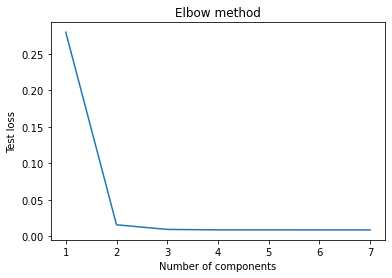

In [5]:
n_comps = np.arange(1, 8)
losses = []
for n in n_comps:
    loss = 0
    for _ in range(3):
        model = neuralnetwork.NeuralNetwork(n_comps=n, n_params=NUM_PARAMS)
        neuralnetwork.train_NN(model, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)
    loss += neuralnetwork.mean_loss(X_test, y_test, model, loss=neuralnetwork.loss_hellinger).detach().item()
    losses.append(loss/3)
    print(f'Computed loss with {n} components - average loss = {loss/3}.')
plt.plot(n_comps, losses)
plt.xlabel('Number of components')
plt.ylabel('Test loss')
plt.title('Elbow method')
plt.show()

In [7]:
N_COMPS = 3

## Training models

We train 3 different models to compare their accuracy.

In [8]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)

Neural Network created.
Neural Network created.
Neural Network created.


In [9]:
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)

Training ...: 100%|█████████▉| 499/500 [02:47<00:00,  2.99it/s]


Learning rate: 0.0003125,
Train loss: 0.002631615614518523,
 Valid loss: 0.002598891034722328


Training ...:  99%|█████████▉| 494/500 [02:39<00:01,  3.10it/s]


Learning rate: 0.0003125,
Train loss: 0.002644068095833063,
 Valid loss: 0.0026396559551358223


Training ...: 100%|█████████▉| 499/500 [02:38<00:00,  3.15it/s]

Learning rate: 0.0003125,
Train loss: 0.002627032808959484,
 Valid loss: 0.002616177313029766


In [8]:
# Compute losses

print("Training dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_train3, y_train3, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_train3, y_train3, model3, loss=neuralnetwork.loss_hellinger)}')

print("\nValidation dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_valid3, y_valid3, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_valid3, y_valid3, model3, loss=neuralnetwork.loss_hellinger)}')

print("\nTest dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_hellinger)}')


Training dataset
KLD : 0.0028098649345338345
Hellinger : 0.028046833351254463

Validation dataset
KLD : 0.0028111529536545277
Hellinger : 0.02813834138214588

Test dataset
KLD : 0.0028225984424352646
Hellinger : 0.02813178114593029


## Distributions plot


In [10]:
def plot_model(to_pred, 
            models, 
            up_bound=500,
            n_comps=N_COMPS, 
            index_names = ['Probabilities', 'Abundance of species S'], 
            plot_test_result=(False, None),
            confidence_interval=False,
            plot = ('distribution', None),
            save=(False, None)):
    # prediction
    x = torch.arange(up_bound).repeat(1, n_comps,1).permute([2,0,1])
    preds = []
    for i, model in enumerate(models):
        if plot[0] == 'distribution':
            y_pred = neuralnetwork.mix_nbpdf(model, to_pred, x)
        elif plot[0] == 'sensitivities':
            y_pred = get_sensitivities.sensitivities(to_pred, model, length_output=up_bound)[:, plot[1]+1]
        y_pred = y_pred.detach().numpy()
        pred = pd.DataFrame([np.squeeze(y_pred), np.arange(up_bound)], index = index_names).transpose()
        pred['model'] = f'training{i+1}'
        preds.append(pred)
    if plot_test_result[0]:
        result = plot_test_result[1]
        test_result = pd.DataFrame([np.squeeze(result.detach().numpy()), np.arange(up_bound)], index = index_names).transpose()
        test_result['model'] = 'SSA simulation'
        preds.append(test_result)
    data = pd.concat(preds, ignore_index=True)
    t = round(np.float64(to_pred[0]),2)
    kon = round(np.float64(to_pred[1]),2)
    koff = round(np.float64(to_pred[2]),2)
    kr = round(np.float64(to_pred[3]),2)
    gamma = round(np.float64(to_pred[4]),2)
    if confidence_interval:
        seaborn.relplot(data=data, x=index_names[1], y=index_names[0], aspect=1.5, kind='line').set(title=fr'{plot[0]} plot for bursting gene CRN with $t=${t}, $kon=${kon}, $koff=${koff}, $k_r={kr}$, $\gamma={gamma}$')
    else:
        seaborn.relplot(data=data, x=index_names[1], y=index_names[0], hue='model', style='model', aspect=1.5, kind='line').set(title=fr'{plot[0]} plot for bursting gene CRN with $t=${t}, $kon=${kon}, $koff=${koff}, $k_r={kr}$, $\gamma={gamma}$')
    if save[0]:
        plt.savefig(save[1])

In [11]:
def multiple_plots(preds,
            models,
            up_bound,
            n_comps=N_COMPS,
            index_names = ['Probabilities', 'Abundance of species S'],
            plot_test_result=(False, None),
            confidence_interval=False,
            plot = ('distribution', None),
            n_col = 2,
            save=(False,None)):
    n = len(preds)
    if n == 1:
            plot_model(preds[0], models, n_comps, up_bound, index_names, plot_test_result, confidence_interval, plot)
    else:
        fig, axes = plt.subplots(math.ceil(n/n_col), n_col, figsize=(12,12))
        for k, to_pred in enumerate(preds):
            x = torch.arange(up_bound[k]).repeat(1, n_comps,1).permute([2,0,1])
            preds = []
            for i, model in enumerate(models):
                if plot[0] == 'distribution':
                    y_pred = neuralnetwork.mix_nbpdf(model, to_pred, x)
                elif plot[0] == 'sensitivities':
                    y_pred = get_sensitivities.sensitivities(to_pred, model, length_output=up_bound[k])[:, plot[1]+1]
                y_pred = y_pred.detach().numpy()
                pred = pd.DataFrame([np.squeeze(y_pred), np.arange(up_bound[k])], index = index_names).transpose()
                pred['model'] = f'training{i+1}'
                preds.append(pred)
            if plot_test_result[0]:
                result = plot_test_result[1][k]
                test_result = pd.DataFrame([np.squeeze(result.detach().numpy()), np.arange(up_bound[k])], index = index_names).transpose()
                test_result['model'] = 'SSA simulation'
                preds.append(test_result)
            data = pd.concat(preds, ignore_index=True)
            t = round(np.float64(to_pred[0]),2)
            kon = round(np.float64(to_pred[1]),2)
            koff = round(np.float64(to_pred[2]),2)
            kr = round(np.float64(to_pred[3]),2)
            gamma = round(np.float64(to_pred[4]),2)
            if confidence_interval:
                seaborn.lineplot(ax=axes[k//n_col, k%n_col], data=data, x=index_names[1], y=index_names[0])
            else:
                seaborn.lineplot(ax=axes[k//n_col, k%n_col], data=data, x=index_names[1], y=index_names[0], hue='model', style='model')
            axes[k//n_col, k%n_col].set_title(fr'$t=${t}, $kon=${kon}, $koff=${koff}, $k_r={kr}$, $\gamma={gamma}$')
        plt.subplots_adjust(hspace=0.01)
        fig.suptitle(fr'{plot[0]} plot for bursting gene CRN')
        if save[0]:
            plt.savefig(save[1])

In [18]:
print(X_test[0,:])

tensor([5.0000, 0.8597, 2.5792, 5.0000, 0.0500])


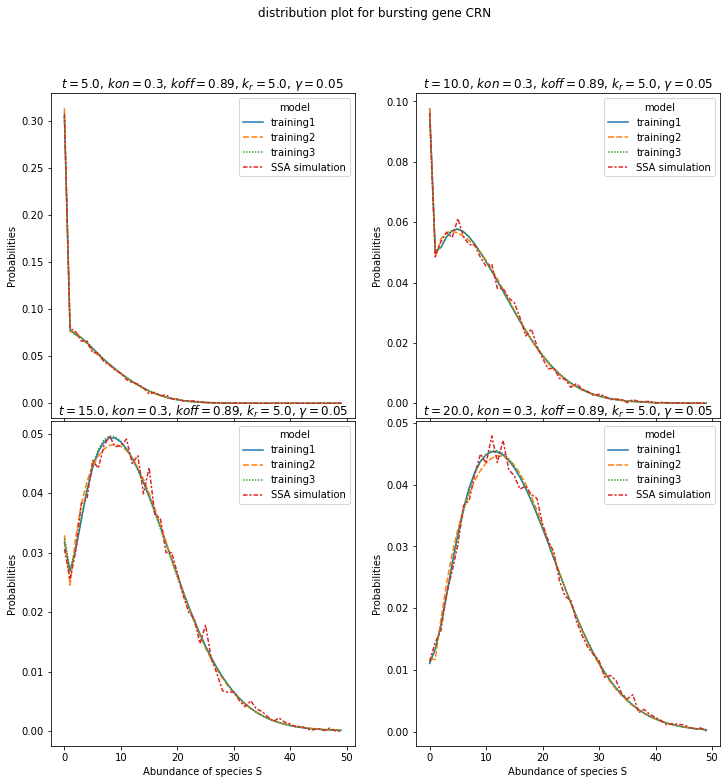

In [24]:
multiple_plots([X_test[20+k,:] for k in range(4)], [model1, model2, model3], up_bound = 4*[50], plot_test_result = (True, [y_test[20+k,:] for k in range(4)]), save=(True, '4distributions_2.png'))

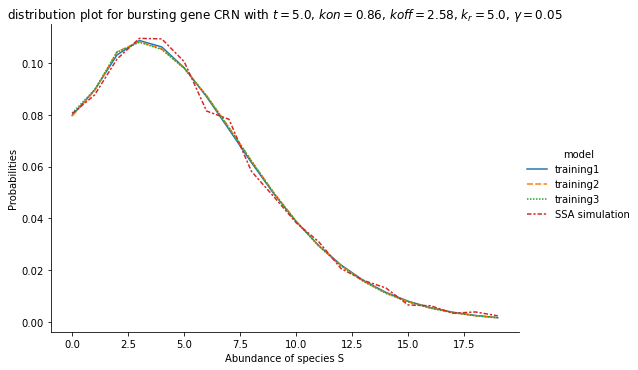

In [13]:
index = 0
plot_model(X_test[index,:], [model1, model2, model3], up_bound = 20, plot_test_result=(True, y_test[index, :]))

We can check the accuracy for higher times than those of the training:

In [1]:
plot_model(torch.tensor([30., 0.5, 1.5, 5., 0.05]), [model1, model2, model3], up_bound = 100, confidence_interval=False, save=(True, 't50kon4koff13.png'))

NameError: name 'plot_model' is not defined

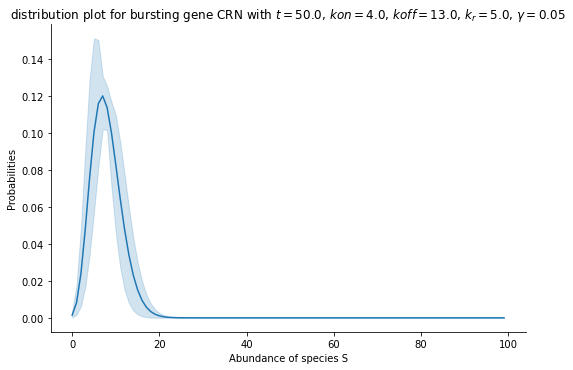

In [15]:
# alpha = 80
plot_model(torch.tensor([50., 4, 13, 5., 0.05]), [model1, model2, model3], up_bound = 100, confidence_interval=True)

We can also check the accuracy for parameters outside the bounds of the training.

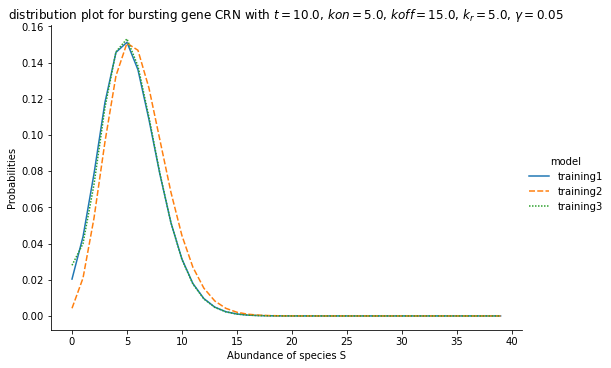

In [27]:
# alpha = 100
plot_model(torch.tensor([10., 5., 15, 5., 0.05]), [model1, model2, model3], up_bound = 40, confidence_interval=False, save=(True, 't10kon5koff15'))

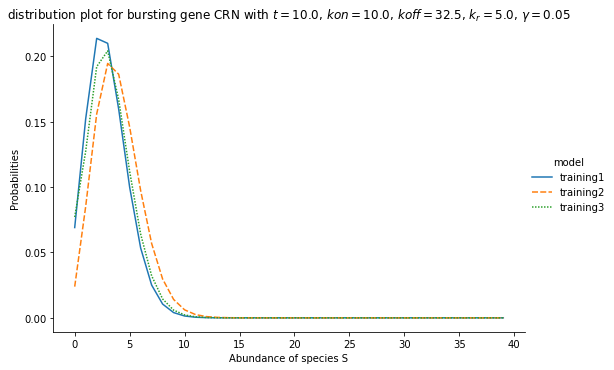

In [29]:
# alpha = 200
plot_model(torch.tensor([10., 10., 32.5, 5., 0.05]), [model1, model2, model3], up_bound = 40, confidence_interval=False, save=(True, 't10kon10koff32demi.png'))

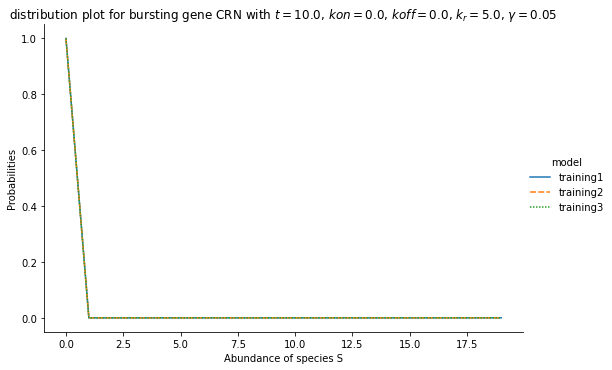

In [31]:
plot_model(torch.tensor([10., 0.05*1e-3, 0.15*1e-3, 5., 0.05]), [model1, model2, model3], up_bound = 20, save=(True, 't10kon005e-3koff015e-3.png'))

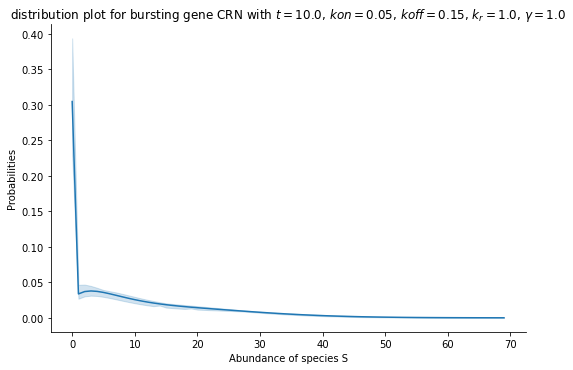

In [19]:
plot_model(torch.tensor([10., 0.05, 0.15, 1., 1.]), [model1, model2, model3], up_bound = 70, confidence_interval=True)

## Sentivities plot

To compute sensitivities and compare them to the theoretical ones. 

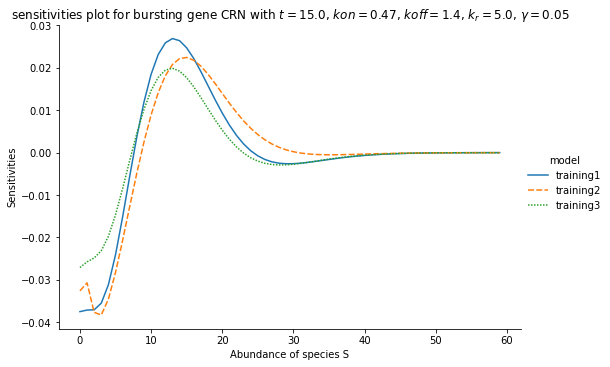

In [32]:
plot_model(X_test[10], [model1, model2, model3], up_bound=60, plot=('sensitivities', 0), index_names = ['Sensitivities', 'Abundance of species S'], save=(True, 'sensitivities_t15kon47koff14.png'))

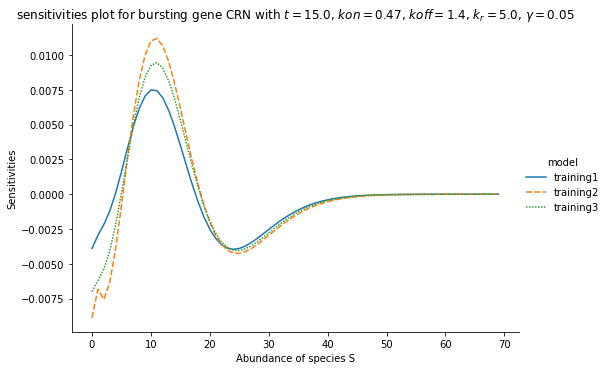

In [33]:
plot_model(X_test[10], [model1, model2, model3], up_bound=70, plot=('sensitivities', 1), confidence_interval=False, index_names = ['Sensitivities', 'Abundance of species S'], save=(True, 'sensitivities_koff_t15kon47koff14.png'))

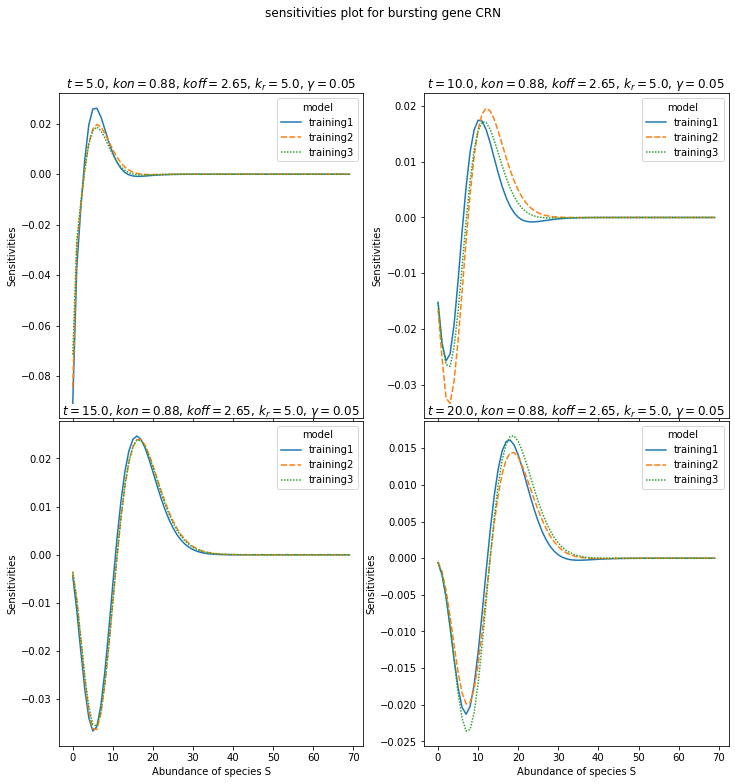

In [34]:
multiple_plots(preds=[X_test[992+k,:] for k in range(4)], models=[model1, model2, model3], up_bound = [70]*5, plot=('sensitivities', 0), index_names = ['Sensitivities', 'Abundance of species S'], save=(True, 'sensitivities_kon.png'))

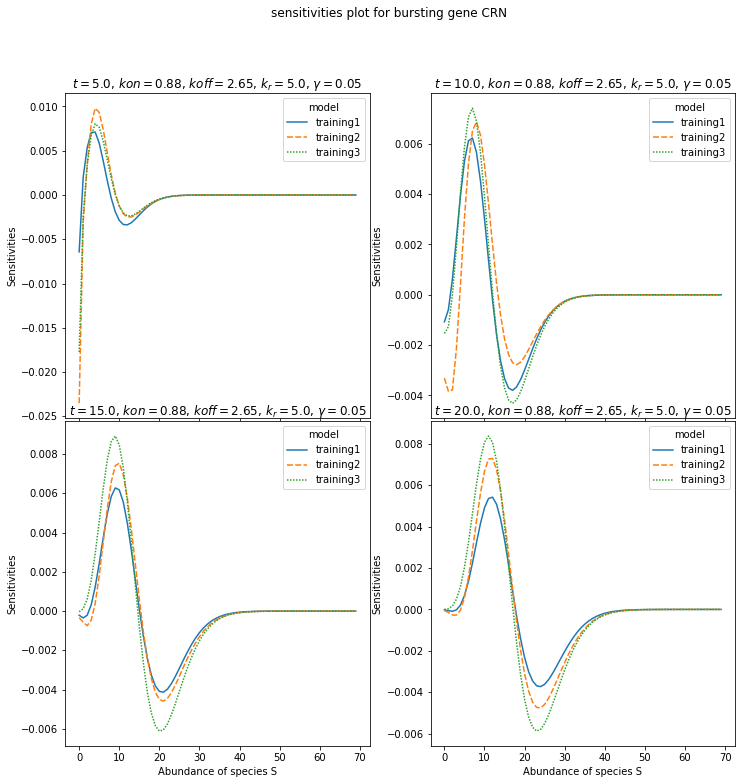

In [35]:
multiple_plots(preds=[X_test[992+k,:] for k in range(4)], models=[model1, model2, model3], up_bound = [70]*5, plot=('sensitivities', 1), index_names = ['Sensitivities', 'Abundance of species S'], save=(True, 'sensitivities_koff.png'))

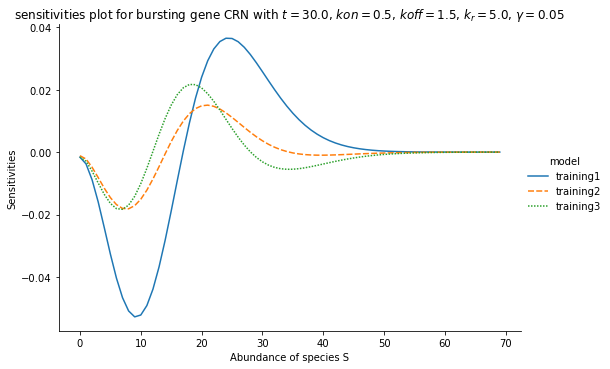

In [11]:
# alpha=10
plot_model(torch.tensor([30, 0.5, 1.5, 5, 0.05]), [model1, model2, model3], up_bound=70, plot=('sensitivities', 0), confidence_interval=False, index_names = ['Sensitivities', 'Abundance of species S'], save=(True, 'sensitivities_kon_thigher.png'))

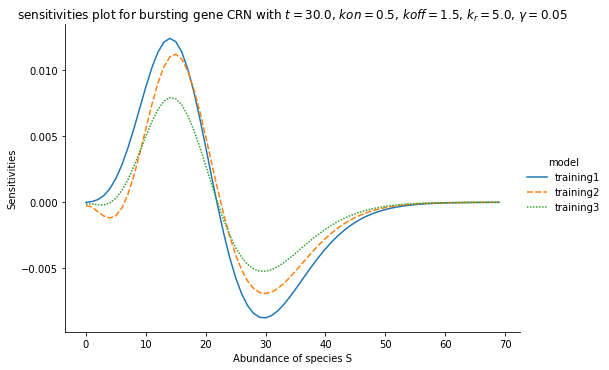

In [12]:
plot_model(torch.tensor([30, 0.5, 1.5, 5, 0.05]), [model1, model2, model3], up_bound=70, plot=('sensitivities', 1), confidence_interval=False, index_names = ['Sensitivities', 'Abundance of species S'], save=(True, 'sensitivities_koff_thigher.png'))

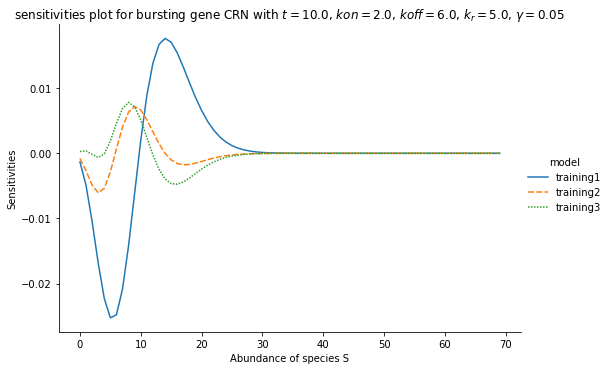

In [15]:
# alpha=40
plot_model(torch.tensor([10, 2, 6, 5, 0.05]), [model1, model2, model3], up_bound=70, plot=('sensitivities', 0), confidence_interval=False, index_names = ['Sensitivities', 'Abundance of species S'], save=(True, 'sensitivities_kon_alphahigher.png'))

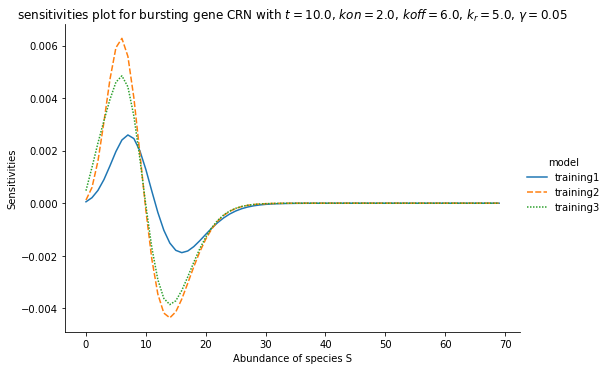

In [16]:
# alpha=40
plot_model(torch.tensor([10, 2, 6, 5, 0.05]), [model1, model2, model3], up_bound=70, plot=('sensitivities', 1), confidence_interval=False, index_names = ['Sensitivities', 'Abundance of species S'], save=(True, 'sensitivities_koff_alphahigher.png'))

## Fisher information

In [12]:
def fi_table_multiple(time_samples, 
            params, 
            ind_param, 
            models = (False, None, 3),
            exact: Tuple[bool, Callable] =(False, None), 
            fsp = (False, np.zeros(1), [], 10, None),
            up_bound = 100):
    rows = [fr'$t={t}$' for t in time_samples]
    n_rows = len(time_samples)
    # compute probabilities and sensitivities with the neural networks
    if models[0]:
        probabilities_m = np.zeros((len(time_samples),up_bound))
        stv_m = np.zeros((len(time_samples),up_bound, len(params)))
        x = torch.arange(up_bound).repeat(1, models[2],1).permute([2,0,1])
        for model in models[1]:
            for i, t in enumerate(time_samples):
                to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))
                sens, probs = get_sensitivities.sensitivities(to_pred, model, length_output=up_bound, with_probs=True)
                probabilities_m[i,:] += probs[:,0].numpy()
                stv_m[i,:,:] += sens[:,1:].numpy()
        probabilities_m /= len(models[1])
        stv_m /= len(models[1])
        # compute FIM
        predicted_fi = np.zeros(n_rows)
        for i in range(n_rows):
            fim_m = ode.fisher_information_t(probabilities_m[i,:], stv_m[i,:,:])
            predicted_fi[i] = fim_m[ind_param, ind_param]
    # compute probabilities and sensitivities with the FSP
    if fsp[0]:
        crn = simulation.CRN(fsp[1], fsp[2], len(params))
        stv_calculator = ode.SensitivitiesDerivation(crn, fsp[3])
        n_cr = int(fsp[3]*(fsp[3]+3)/2+1)
        if fsp[4]:
            init_state = fsp[4]
        else:
            init_state = np.zeros(2*n_cr)
            init_state[1] = 1
            init_state = np.stack([init_state]*crn.n_reactions)
        probs_fsp, stv_fsp = stv_calculator.get_sensitivities(init_state, 0, time_samples[-1], params.numpy(), t_eval=time_samples)
        fsp_fi = np.zeros(n_rows)
        for i in range(n_rows):
            fim = ode.fisher_information_t(probs_fsp[i,:], stv_fsp[i,:,:])
            fsp_fi[i] = fim[ind_param, ind_param]
    # add condition for models and fsp
    columns = []
    data = []
    # gathering data
    if models[0]:
        columns.append('Predicted with NN')
        data.append(np.round(predicted_fi,3))
    if fsp[0]:
        columns.append('Estimated with FSP')
        data.append(np.round(fsp_fi, 3))
    if exact[0]:
        columns.append('Exact')
        exact_fi = np.zeros(n_rows)
        for i, t in enumerate(time_samples):
            exact_fi[i] = exact[1](t, params.numpy())
        data.append(np.round(exact_fi,3))
    if len(data)==1:
        data = np.array(data).T
    else:
        data = np.stack(data, axis=-1)
    #plot
    fig, ax = plt.subplots(figsize=(8,3))
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    table = plt.table(cellText=data, colLabels=columns, rowLabels=rows, loc='center', cellLoc='center', colWidths=[1.]*len(columns))
    table.set_fontsize(14)
    table.scale(0.4,1.6)
    plt.subplots_adjust(left=0.2, bottom=0.2)
    fig.suptitle(f'Fisher Information - parameter n°{ind_param} - parameter values {params}')
    plt.show()

/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_56047/1035999845.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))


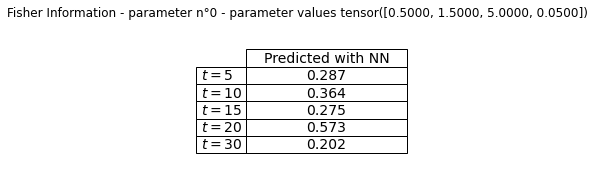

In [15]:
fi_table_multiple([5, 10, 15, 20, 30], torch.tensor([0.5, 1.5, 5., 0.05]), ind_param=0, models = (True, [model1, model2, model3], N_COMPS))#, fsp=(True, propensities.stoich_mat, propensities.propensities, 100, None))

/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_56047/1035999845.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))


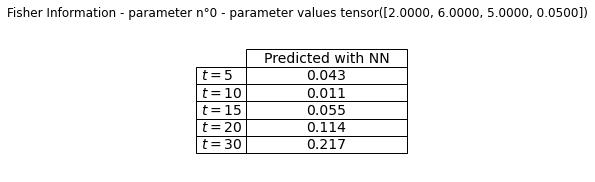

In [14]:
fi_table_multiple([5, 10, 15, 20, 30], torch.tensor([2, 6, 5., 0.05]), ind_param=0, models = (True, [model1, model2, model3], N_COMPS))#, fsp=(True, propensities.stoich_mat, propensities.propensities, 100, None))